In [2]:
# image+svm+pm+fscore with ficher
import rasterio
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\pc\jupyter\5 profile\concatenated_full.csv')

os.chdir(r'C:\Users\pc\Desktop\PFE\case 4')
data = data[data.iloc[:, -1] != 0]
data = data.drop(data.index[-1])
data = data[(data.iloc[:, -1] >= 1) & (data.iloc[:, -1] <= 4)]
# Displaying the filled DataFrame
display(data.head(10).style.format("{0:.2f}").set_caption("Few lines of the dataset:"))

# Checking the count of missing data and the shape of the DataFrame
print('Missing Data:', data.isna().sum().sum(), 'Shape is:', data.shape)

,0,1,2,3,4,0.1,1.1,2.1,3.1,4.1,0.2,1.2,2.2,3.2,4.2,0.3,1.3,2.3,3.3,4.3,0.4,1.4,2.4,3.4,4.4,0.5,1.5,2.5,3.5,4.5,0.6,1.6,2.6,3.6,4.6,0.7,1.7,2.7,3.7,4.7,0.8,1.8,2.8,3.8,4.8,0.9,1.9,2.9,3.9,4.9,0.10,1.10,2.10,3.10,4.10,5,6,7,8,9,0.11
2362,1792.00,1820.00,1820.00,1820.00,1792.00,2174.00,2200.00,2154.00,2154.00,2154.00,2484.00,2484.00,2484.00,2484.00,2484.00,2726.00,2730.00,2730.00,2730.00,2726.00,2784.00,2784.00,2784.00,2784.00,2784.00,2852.00,2852.00,2852.00,2852.00,2852.00,2770.00,2770.00,2760.00,2760.00,2760.00,2795.00,2795.00,2795.00,2795.00,2795.00,3220.00,3220.00,3220.00,3220.00,3220.00,2792.00,2929.00,2955.00,2929.00,2792.00,1820.00,2154.00,2484.00,2730.00,2784.00,2852.00,2760.00,2795.00,3220.00,2955.00,3.00
3361,1792.00,1810.00,1810.00,1810.00,1792.00,2174.00,2200.00,2188.00,2188.00,2174.00,2476.00,2476.00,2428.00,2428.00,2428.00,2726.00,2730.00,2730.00,2730.00,2726.00,2784.00,2784.00,2784.00,2784.00,2784.00,2852.00,2852.00,2852.00,2852.00,2852.00,2770.00,2770.00,2732.00,2732.00,2732.00,2795.00,2795.00,2795.00,2795.00,2795.00,3220.00,3220.00,3220.00,3220.00,3220.00,2792.00,2929.00,2955.00,2929.00,2792.00,1810.00,2188.00,2428.00,2730.00,2784.00,2852.00,2732.00,2795.00,3220.00,2955.00,3.00
3362,1792.00,1824.00,1894.00,1824.00,1792.00,2174.00,2230.00,2288.00,2230.00,2174.00,2506.00,2510.00,2516.00,2510.00,2506.00,2726.00,2730.00,2730.00,2730.00,2726.00,2784.00,2784.00,2784.00,2784.00,2784.00,2852.00,2852.00,2852.00,2852.00,2852.00,2864.00,2864.00,2864.00,2864.00,2864.00,2795.00,2795.00,2795.00,2795.00,2795.00,3220.00,3220.00,3220.00,3220.00,3220.00,2792.00,2929.00,2955.00,2929.00,2792.00,1894.00,2288.00,2516.00,2730.00,2784.00,2852.00,2864.00,2795.00,3220.00,2955.00,3.00
3363,1792.00,1824.00,1844.00,1824.00,1792.00,2174.00,2208.00,2208.00,2208.00,2174.00,2462.00,2462.00,2462.00,2462.00,2462.00,2726.00,2750.00,2750.00,2750.00,2726.00,2869.00,2869.00,2869.00,2869.00,2869.00,2838.00,2838.00,2838.00,2838.00,2838.00,2924.00,2924.00,2924.00,2924.00,2924.00,2832.00,2832.00,2832.00,2832.00,2832.00,3286.00,3367.00,3367.00,3367.00,3286.00,2792.00,2929.00,3069.00,2929.00,2792.00,1844.00,2208.00,2462.00,2750.00,2869.00,2838.00,2924.00,2832.00,3367.00,3069.00,3.00
3364,1792.00,1804.00,1804.00,1804.00,1792.00,2174.00,2200.00,2186.00,2186.00,2174.00,2432.00,2432.00,2430.00,2430.00,2430.00,2726.00,2750.00,2750.00,2750.00,2726.00,2869.00,2869.00,2869.00,2869.00,2869.00,2838.00,2838.00,2838.00,2838.00,2838.00,2988.00,2988.00,2988.00,2988.00,2988.00,2832.00,2832.00,2832.00,2832.00,2832.00,3286.00,3367.00,3367.00,3367.00,3286.00,2792.00,2929.00,3069.00,2929.00,2792.00,1804.00,2186.00,2430.00,2750.00,2869.00,2838.00,2988.00,2832.00,3367.00,3069.00,3.00
4360,1792.00,1824.00,1824.00,1824.00,1792.00,2174.00,2230.00,2230.00,2230.00,2174.00,2476.00,2476.00,2462.00,2462.00,2462.00,2676.00,2676.00,2676.00,2676.00,2676.00,2736.00,2736.00,2736.00,2736.00,2736.00,2837.00,2837.00,2837.00,2837.00,2837.00,2776.00,2776.00,2776.00,2776.00,2776.00,2840.00,2840.00,2840.00,2840.00,2840.00,3186.00,3186.00,3186.00,3186.00,3186.00,2792.00,2891.00,2891.00,2891.00,2792.00,1824.00,2230.00,2462.00,2676.00,2736.00,2837.00,2776.00,2840.00,3186.00,2891.00,3.00
4361,1792.00,1824.00,1868.00,1824.00,1792.00,2174.00,2230.00,2236.00,2230.00,2174.00,2506.00,2510.00,2520.00,2510.00,2506.00,2721.00,2721.00,2721.00,2721.00,2721.00,2834.00,2834.00,2834.00,2834.00,2834.00,2887.00,2887.00,2887.00,2887.00,2887.00,2874.00,2874.00,2874.00,2874.00,2874.00,2895.00,2895.00,2895.00,2895.00,2895.00,3286.00,3295.00,3295.00,3295.00,3286.00,2792.00,2905.00,2905.00,2905.00,2792.00,1868.00,2236.00,2520.00,2721.00,2834.00,2887.00,2874.00,2895.00,3295.00,2905.00,3.00
4362,1792.00,1816.00,1816.00,1816.00,1792.00,2174.00,2230.00,2256.00,2230.00,2174.00,2476.00,2476.00,2476.00,2476.00,2476.00,2721.00,2721.00,2721.00,2721.00,2721.00,2834.00,2834.00,2834.00,2834.00,2834.00,2887.00,2887.00,2887.00,2887.00,2887.00,2982.00,2982.00,2982.00,2982.00,2982.00,2895.00,2895.00,2895.00,2895.00,2895.00,3286.00,3295.0

Missing Data: 0 Shape is: (9132, 61)


In [4]:
data_array = np.array([data])
print(data_array.shape)
x = data_array[0, :, 0:60]
y = data_array[0, :, 60]

(1, 9132, 61)


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, cohen_kappa_score, accuracy_score


############################  Split data ######
seed=42
y_train,y_test,x_train,x_test=train_test_split(y,x,test_size=0.20,random_state=42)
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)


x_train :  (7305, 60)
y_train :  (7305,)
x_test  :  (1827, 60)
y_test  :  (1827,)


In [6]:
import tensorflow as tf
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [7]:
from sklearn import svm
# apply SVM to get a classified image
clf = svm.SVC(kernel='rbf',C=1.0,gamma='scale')
clf.fit(x_train,y_train)
y_predicted= clf.predict(x_test)
accuracy=accuracy_score(y_test,y_predicted)
print(accuracy)

0.9896004378762999


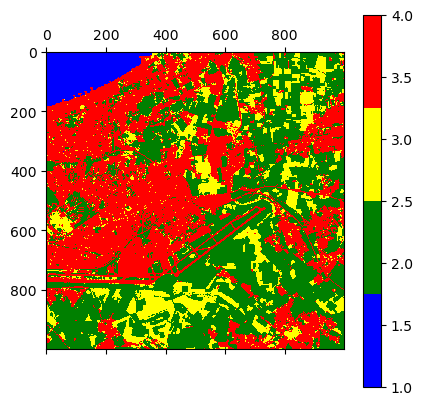

In [8]:
from matplotlib.colors import ListedColormap
# Load the data from the CSV file
data1 = pd.read_csv(r'C:\Users\pc\jupyter\5 profile\pm and image.csv')

# Normalize the data
data1 = tf.keras.utils.normalize(data1, axis=1)

# Predict using the model
predicted = clf.predict(data1)

# Reshape the predicted classes to match image dimensions
height, width = 1000, 1000
predicted_image = np.reshape(predicted, (height, width))
# Define the custom color palette for each class
colors = ['blue', 'green', 'yellow', 'red']
cmap = ListedColormap(colors)
# Display the image
plt.matshow(predicted_image, cmap=cmap)
plt.colorbar()
plt.show()

In [9]:
predicted_df=pd.DataFrame(predicted_image)
predicted_flat=predicted_image.flatten()
predicted_df= pd.DataFrame({'Predicted':predicted_flat})

In [10]:
df1=pd.read_csv(r'C:\Users\pc\jupyter\5 profile\pm and image.csv')
data=pd.concat([df1,predicted_df],axis=1)
print('Missing Data:', data.isna().sum().sum(), 'Shape is:', data.shape)

Missing Data: 0 Shape is: (1000000, 61)


In [11]:
data_array = np.array([data])
print(data_array.shape)
x = data_array[0, :, 0:60]
y = data_array[0, :, 60]

(1, 1000000, 61)


In [12]:
# calcule de Fscore et ficher
from sklearn.feature_selection import f_classif
from skimage.filters import threshold_otsu
fit=f_classif(x,y)[0]
sorted_indices=np.argsort(fit)[::-1]
sorted_fscores=fit[sorted_indices]
print(sorted_indices,sorted_fscores,sep='\n\n')
# ficher
def fisher_threshold(F_scores):
  """
  This function applies the Ficher thresholding method on a list of F scores.

  Args:
      F_scores: A sorted list of F scores.

  Returns:
    the Ficher threshold
  """
  # Calculate the number of features
  num_features = len(F_scores)
  fisher_scores=[]
  for i in range(num_features):
          if i ==0:
              moy1=sorted_fscores[0]
              moy2=(1/(num_features-1))*sum(sorted_fscores[1:])
          elif i ==59:
              moy1=(1/i+1)*sum(sorted_fscores[:i+1])
              moy2=0
              
          else:
              moy1=(1/i+1)*sum(sorted_fscores[:i+1])
              moy2=(1/(num_features-i))*sum(sorted_fscores[i+1:])
              
          
          
          # Calculate the variance of F scores
          var1= sum((sorted_fscores[:i+1] - moy1)**2)
          var2=sum((sorted_fscores[i+1:] - moy2)**2)
          
          
          fisher=abs(moy1-moy2)/abs(var1-var2)
          fisher_scores.append(fisher)
  return fisher_scores
# list of ficher scores
fisher_scores=fisher_threshold(sorted_fscores)
# max of ficher scores' index
F=fisher_scores.index(max(fisher_scores))
# corresponding value of F-score
thresh=sorted_fscores[F]
print(thresh)



[35 45 40 36 25 46 39 30 20 38 26 31 49 29 10 48 28 21 37 57 34 24 41 11
 33 15 23 44 55 27 59 47 14 56 32 43 54 22 13 16  0 58 42 19  1  5 52 12
 18  4  6  3 17 53  9  8 50  2  7 51]

[592319.81955537 576516.80065667 561697.27677453 556210.59986416
 546563.0212363  541076.16058952 538318.63909551 532910.07170308
 519610.4644484  512701.19721525 508045.3056631  506291.72863517
 506125.48799669 496605.69542904 494507.04530262 472571.15239585
 467990.59654059 466635.05003728 455082.06316984 455082.06316984
 453929.17516888 453034.04256117 451951.22850522 447433.51203385
 440569.72445855 433343.8114266  418896.73263243 408514.66716264
 407840.84950328 407840.84950328 405685.31851588 405685.31851588
 392715.13246987 367705.58018193 367705.58018193 363688.55556314
 350199.85958256 350199.85958256 344524.41570615 334383.84117921
 328348.26510445 306084.05573006 306084.05573006 297580.23852441
 276303.32289141 269676.80650817 254288.04109773 254288.04109773
 251668.89800834 250322.94814441 22

In [13]:
taken=[]
for i in range(len(sorted_fscores)):
    if sorted_fscores[i]>=thresh:
        taken.append(sorted_indices[i])

print(taken)


[35, 45]


In [15]:
x1=x[:,taken]
print(x1.shape)
x1=pd.DataFrame(x1,columns=taken)
x2=pd.read_csv(r'C:\Users\pc\Desktop\PFE\case1\image_test2.csv',header=None)
print(x1)
x1= pd.concat([x1,x2],axis=1)
print('Missing Data:', x1.isna().sum().sum(), 'Shape is:', x1.shape)
print(x1)
x1.to_csv(r'selected ficher.csv',index=False)

(1000000, 2)
            35      45
0       1106.0  1074.0
1       1106.0  1074.0
2       1106.0  1074.0
3       1104.0  1074.0
4       1104.0  1074.0
...        ...     ...
999995  4688.0  1605.0
999996  4688.0  1605.0
999997  4688.0  1605.0
999998  4688.0  1605.0
999999  4688.0  1605.0

[1000000 rows x 2 columns]
Missing Data: 0 Shape is: (1000000, 12)
            35      45    0     1     2     3     4     5     6     7     8   \
0       1106.0  1074.0  1262  1263  1130  1108  1095  1106  1090  1110  1077   
1       1106.0  1074.0  1240  1268  1130  1119  1105  1091  1123  1118  1085   
2       1106.0  1074.0  1278  1273  1127  1119  1105  1091  1128  1118  1085   
3       1104.0  1074.0  1260  1253  1122  1114  1096  1092  1100  1096  1086   
4       1104.0  1074.0  1220  1248  1139  1114  1096  1092  1104  1096  1086   
...        ...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
999995  4688.0  1605.0  1172  1461  1244  1914  3910  4480  4856  4688  2304   
999

In [68]:
# Charger les fichiers CSV
df1 = pd.read_csv(r'selected ficher.csv')
df2 = pd.read_csv(r'C:\Users\pc\jupyter\R1.csv')
result = pd.concat([df1, df2], axis=1)
print(result)
# Enregistrer le résultat dans un nouveau fichier CSV
result.to_csv(r'fscore ficher.csv', index=False)


In [69]:
data = result[result.iloc[:, -1] != 0]
data = data.drop(data.index[-1])
# Displaying the filled DataFrame

display(data.head(10).style.format("{0:}").set_caption("Few lines of the dataset:"))
# Checking the count of missing data and the shape of the DataFrame
print('Missing Data:', data.isna().sum().sum(), 'Shape is:', data.shape)

,35,45,1262,1263,1130,1108,1095,1106,1090,1110,1077,1067,0
2362,2795.0,2792.0,1817.0,2178.0,2474.0,2750.0,2869.0,2838.0,2788.0,2832.0,3367.0,3069.0,3.0
3361,2795.0,2792.0,1894.0,2288.0,2516.0,2730.0,2784.0,2852.0,2864.0,2795.0,3220.0,2955.0,3.0
3362,2795.0,2792.0,1844.0,2208.0,2462.0,2750.0,2869.0,2838.0,2924.0,2832.0,3367.0,3069.0,3.0
3363,2832.0,2792.0,1804.0,2186.0,2430.0,2750.0,2869.0,2838.0,2988.0,2832.0,3367.0,3069.0,3.0
3364,2832.0,2792.0,1838.0,2260.0,2528.0,2797.0,2922.0,2899.0,3036.0,2953.0,3482.0,3113.0,3.0
4360,2840.0,2792.0,1868.0,2236.0,2520.0,2721.0,2834.0,2887.0,2874.0,2895.0,3295.0,2905.0,3.0
4361,2895.0,2792.0,1816.0,2256.0,2476.0,2721.0,2834.0,2887.0,2982.0,2895.0,3295.0,2905.0,3.0
4362,2895.0,2792.0,1778.0,2218.0,2432.0,2742.0,2914.0,2995.0,3036.0,3044.0,3434.0,2985.0,3.0
4363,3044.0,2792.0,1740.0,2154.0,2432.0,2742.0,2914.0,2995.0,3058.0,3044.0,3434.0,2985.0,3.0
4364,3044.0,2792.0,1777.0,2192.0,2448.0,2770.0,2991.0,3046.0,3114.0,3075.0,3501.0,2994.0,3.0


Missing Data: 0 Shape is: (9132, 13)


In [70]:
data_array = np.array([data])
print(data_array.shape)
x = data_array[0, :, 0:12]
y = data_array[0, :, 12]

(1, 9132, 13)


In [71]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, cohen_kappa_score, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout,GlobalMaxPooling1D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers

In [72]:
############################  Split data ######
seed=42
y_train,y_test,x_train,x_test=train_test_split(y,x,test_size=0.20,random_state=42)
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)


x_train :  (7305, 12)
y_train :  (7305,)
x_test  :  (1827, 12)
y_test  :  (1827,)


In [73]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

################## Reshape the Data ###########################

sample_size =x_train.shape[0] # number of samples in train set
time_steps  =x_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

x_train_reshaped = x_train.reshape(sample_size,time_steps,input_dimension)
x_test_reshaped = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print("After reshape train data set shape:\n", x_train_reshaped.shape)
print("1 Sample shape:\n",x_train_reshaped[0].shape)
print("An example sample:\n", x_train_reshaped[0])


print("After reshape test data set shape:\n", x_test_reshaped.shape)
print("1 Sample shape:\n",x_test_reshaped[0].shape)
print("An example sample:\n", x_test_reshaped[0])

# reshape for CNN model (not needed for cnn)
train_shape = x_train_reshaped.shape
input_shape = (train_shape[1], train_shape[2])

After reshape train data set shape:
 (7305, 12, 1)
1 Sample shape:
 (12, 1)
An example sample:
 [[0.42474882]
 [0.12778706]
 [0.08734169]
 [0.10843417]
 [0.08871887]
 [0.13916685]
 [0.36922705]
 [0.43105482]
 [0.44156482]
 [0.43409909]
 [0.18802021]
 [0.12539513]]
After reshape test data set shape:
 (1827, 12, 1)
1 Sample shape:
 (12, 1)
An example sample:
 [[0.30892714]
 [0.32085541]
 [0.19900585]
 [0.22709014]
 [0.2506447 ]
 [0.2636299 ]
 [0.28038988]
 [0.29443202]
 [0.29669689]
 [0.30349147]
 [0.36494472]
 [0.31541974]]


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input
from keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, Input, GlobalMaxPooling1D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras import Model


def build_simple_model():
    model = Sequential()

    # Convolutional layers
    model.add(Conv1D(32, 2, activation="relu", padding='same', input_shape=(12, 1)))
    model.add(Conv1D(32, 2, activation="relu", padding='same'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.2))

    # Dense layers with regularization
    model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.2))

    # Output layer for multiclass classification
    num_classes = 5  # nbr+1
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer='Adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [75]:

# Create callback to stop training if loss not decreasing
stop = EarlyStopping(
    monitor='loss',
    patience=5
)
# Reshape the input data
model = build_simple_model()
# Fit the model
result = model.fit(
    x=x_train_reshaped, y=y_train,
    validation_data=(x_test_reshaped, y_test),
    batch_size=1024,
    callbacks=[stop],
    epochs=100,
)

D:\installed\conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.1899 - loss: 2.0158 - val_accuracy: 0.2386 - val_loss: 1.9644
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3452 - loss: 1.9507 - val_accuracy: 0.4844 - val_loss: 1.9064
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3701 - loss: 1.8941 - val_accuracy: 0.5265 - val_loss: 1.8474
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3772 - loss: 1.8345 - val_accuracy: 0.3306 - val_loss: 1.7832
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3655 - loss: 1.7715 - val_accuracy: 0.3306 - val_loss: 1.7138
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3442 - loss: 1.7026 - val_accuracy: 0.3306 - val_loss: 1.6452
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3371 - loss: 1.6426 - val_accuracy: 0.3306 - val_loss: 1.5853
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3432 - loss: 1.5894 - val_accuracy: 0.3306 - val_loss:

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step


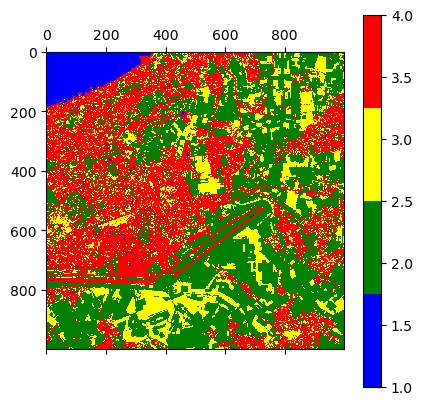

In [76]:
from matplotlib.colors import ListedColormap
# Load the data from the CSV file
data1 = pd.read_csv(r'selected ficher.csv')

# Normalize the data
data1 = tf.keras.utils.normalize(data1, axis=1)

# Predict using the model
predicted = model.predict(data1)

# Convert predicted probabilities to predicted classes
predicted_classes = np.argmax(predicted, axis=1)

# Reshape the predicted classes to match image dimensions
height, width = 1000, 1000
predicted_image = np.reshape(predicted_classes, (height, width))
# Define the custom color palette for each class
colors = ['blue', 'green', 'yellow', 'red']
cmap = ListedColormap(colors)
# Display the image
plt.matshow(predicted_image, cmap=cmap)
plt.colorbar()
plt.show()

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


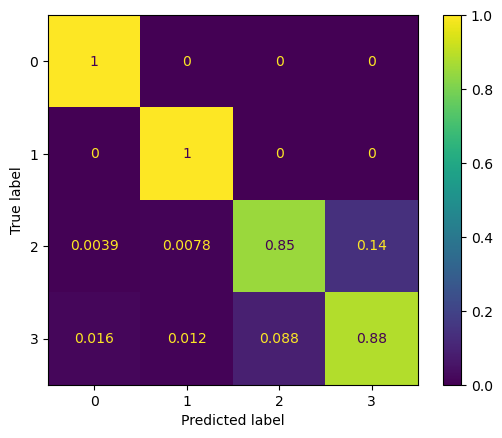

In [77]:
# Predict test data
prediction = np.argmax(model.predict(x_test), axis=1).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, prediction, normalize='true')
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [78]:
# Calculate Cohen's Kappa for the hybrid model
kappa = cohen_kappa_score(y_test, prediction)
print("Cohen's Kappa for CNN Model:", kappa)

# Calculate accuracy for the hybrid model
accuracy = accuracy_score(y_test, prediction)
print("Accuracy for CNN Model:", accuracy)

Cohen's Kappa for CNN Model: 0.9339073726478735
Accuracy for CNN Model: 0.9518336070060208


In [79]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
# Evaluate the model on the validation data
evaluation_results = model.evaluate(x_test_reshaped, y_test)

# Print or use the evaluation results as needed
print("Evaluation Results:", evaluation_results)
# Make predictions using the trained model on the validation data
y_pred = model.predict(x_test)

# Display the shape of the predicted values
print("Shape of Predicted Values:", y_pred.shape)
# Get the indices of the maximum values along axis 1 for predicted values
prediction = np.argmax(y_pred, axis=1)

# Get the indices of the maximum values along axis 1 for actual values (ground truth)
actual = y_test
# Calculating F1 Score using the macro average method
f1 = f1_score(actual, prediction, average='macro')

# Calculating accuracy score
accuracy = accuracy_score(actual, prediction)

# Calculating precision using the macro average method
precision = precision_score(actual, prediction, average='macro')

# Calculating recall using the macro average method
recall = recall_score(actual, prediction, average='macro')

# Printing the computed metrics
print('F1 Score:', f1)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9472 - loss: 0.2595
Evaluation Results: [0.2505991756916046, 0.9518336057662964]
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Shape of Predicted Values: (1827, 5)
F1 Score: 0.9345339577323208
Accuracy: 0.9518336070060208
Precision: 0.935307849126769
Recall: 0.9339432547212434


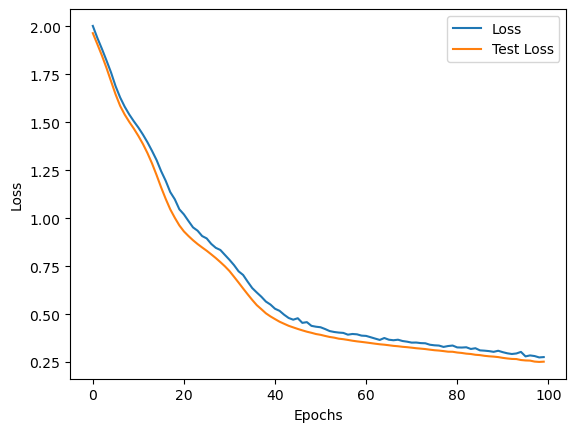

In [80]:
plt.plot(result.history['loss'], label='Loss')
plt.plot(result.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

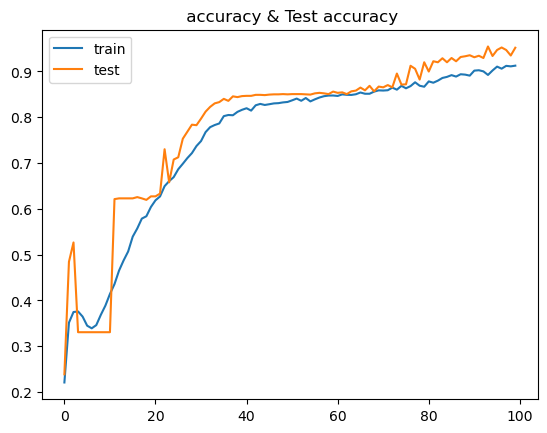

In [81]:
plt.plot(result.history['accuracy'],label='train')### accuracy train
plt.plot(result.history['val_accuracy'],label='test') ### accuracy test
plt.title(' accuracy & Test accuracy')
plt.legend()
plt.show()

In [82]:
y=result.history['val_accuracy']
epoch=[x for x in range(0,len(y))]
data=pd.DataFrame({'x':epoch,'y':y})
data.to_csv('fscore with ficher xy.csv',index=False)